In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
from sklearn.datasets import load_diabetes

# DIABETES DATA EXTRACTION

In [3]:
diabetes =sklearn.datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['Target']=diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

# Data Description

## i)

In [5]:
df.shape

(442, 11)

## ii)

In [6]:
df.head(20)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


## iii)

In [7]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
Target    float64
dtype: object

## iv)

In [8]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [9]:
df.var()

age          0.002268
sex          0.002268
bmi          0.002268
bp           0.002268
s1           0.002268
s2           0.002268
s3           0.002268
s4           0.002268
s5           0.002268
s6           0.002268
Target    5943.331348
dtype: float64

In [10]:
df.std()

age        0.047619
sex        0.047619
bmi        0.047619
bp         0.047619
s1         0.047619
s2         0.047619
s3         0.047619
s4         0.047619
s5         0.047619
s6         0.047619
Target    77.093005
dtype: float64

# PRE PROCESSING

## i)

In [11]:
df=df.round(decimals=3)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018,151.0
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092,75.0
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026,141.0
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009,206.0
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.042,0.051,0.020,0.060,-0.006,-0.003,-0.029,-0.003,0.031,0.007,178.0
438,-0.006,0.051,-0.016,-0.068,0.049,0.079,-0.029,0.034,-0.018,0.044,104.0
439,0.042,0.051,-0.016,0.017,-0.037,-0.014,-0.025,-0.011,-0.047,0.015,132.0
440,-0.045,-0.045,0.039,0.001,0.016,0.015,-0.029,0.027,0.045,-0.026,220.0


In [14]:
cols = list(df.columns)
cols.remove('Target')  

# now iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,agez_score_z_score_zscore,sexz_score_z_score_zscore,bmiz_score_z_score_zscore,bpz_score_z_score_zscore,s1z_score_z_score_zscore,s2z_score_z_score_zscore,s3z_score_z_score_zscore,s4z_score_z_score_zscore,s5z_score_z_score_zscore,s6z_score_z_score_zscore
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018,...,0.798702,1.065488,1.303163,0.462155,-0.925134,-0.735620,-0.904870,-0.063363,0.420396,-0.378120
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092,...,-0.041987,-0.938537,-1.072390,-0.546806,-0.168206,-0.399249,1.556182,-0.823713,-1.431231,-1.934960
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026,...,1.786512,1.065488,0.924756,-0.126405,-0.967186,-0.714597,-0.673489,-0.063363,0.062695,-0.546427
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009,...,-1.870486,-0.938537,-0.252509,-0.778026,0.252309,0.525769,-0.757628,0.718108,0.483520,-0.188774
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047,...,0.105134,-0.938537,-0.757051,0.462155,0.084103,0.336561,0.167896,-0.063363,-0.673747,-0.988233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.042,0.051,0.020,0.060,-0.006,-0.003,-0.029,-0.003,0.031,0.007,...,0.882771,1.065488,0.420214,1.260915,-0.126155,-0.062879,-0.610385,-0.063363,0.651849,0.147840
438,-0.006,0.051,-0.016,-0.068,0.049,0.079,-0.029,0.034,-0.018,0.044,...,-0.126056,1.065488,-0.336599,-1.429646,1.030263,1.661019,-0.610385,0.718108,-0.379170,0.926260
439,0.042,0.051,-0.016,0.017,-0.037,-0.014,-0.025,-0.011,-0.047,0.015,...,0.882771,1.065488,-0.336599,0.357055,-0.777954,-0.294134,-0.526247,-0.232329,-0.989366,0.316147
440,-0.045,-0.045,0.039,0.001,0.016,0.015,-0.029,0.027,0.045,-0.026,...,-0.945728,-0.938537,0.819643,0.020735,0.336412,0.315537,-0.610385,0.570263,0.946426,-0.546427


# Univariate / Bivariate Analysis 

## i)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'s1'}>,
        <AxesSubplot:title={'center':'s2'}>],
       [<AxesSubplot:title={'center':'s3'}>,
        <AxesSubplot:title={'center':'s4'}>,
        <AxesSubplot:title={'center':'s5'}>],
       [<AxesSubplot:title={'center':'s6'}>,
        <AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>]],
      dtype=object)

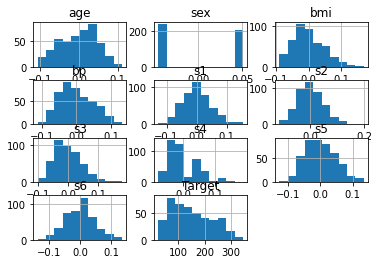

In [15]:
df_histo = df.iloc[:,:11]
df_histo.hist()

## ii)

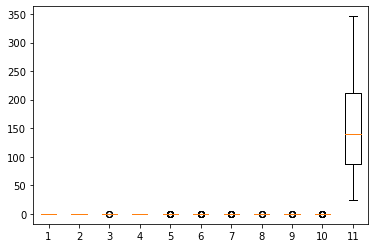

In [16]:
df_bxplt = df.iloc[:,:11] 
plt.boxplot(df_bxplt)
plt.show()

## iii)

<AxesSubplot:xlabel='s6', ylabel='Target'>

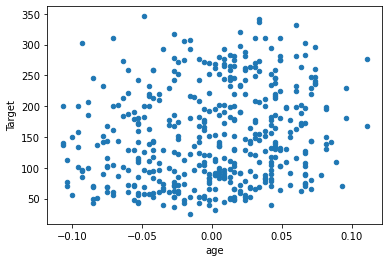

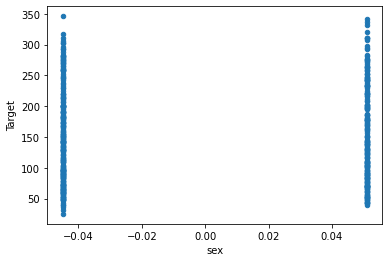

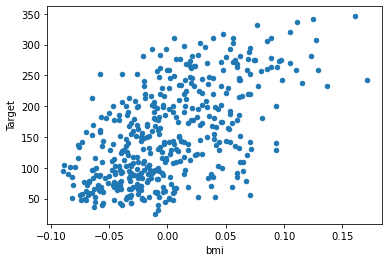

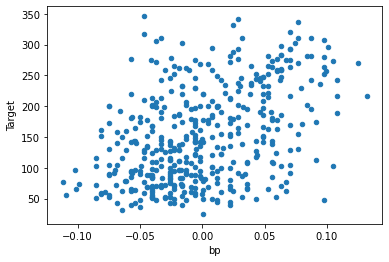

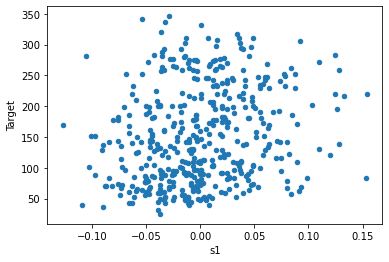

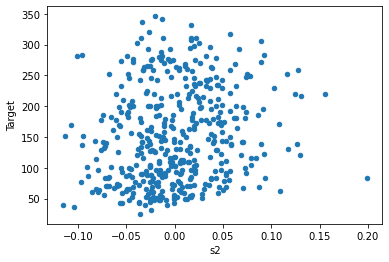

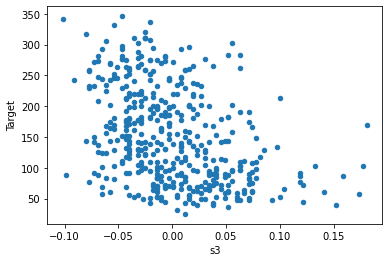

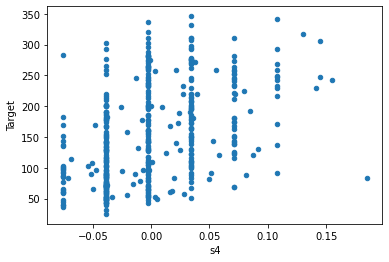

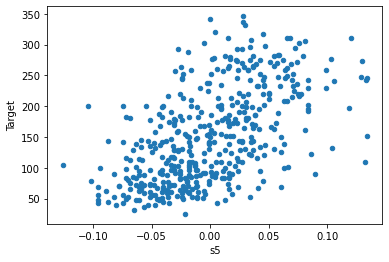

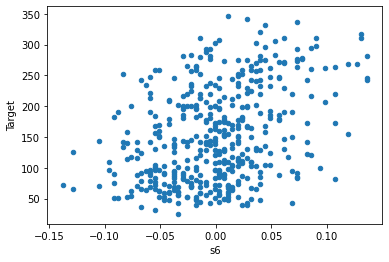

In [17]:
df.plot.scatter(x = 'age', y = 'Target')
df.plot.scatter(x = 'sex', y = 'Target')
df.plot.scatter(x = 'bmi', y = 'Target')
df.plot.scatter(x = 'bp', y = 'Target')
df.plot.scatter(x = 's1', y = 'Target')
df.plot.scatter(x = 's2', y = 'Target')
df.plot.scatter(x = 's3', y = 'Target')
df.plot.scatter(x = 's4', y = 'Target')
df.plot.scatter(x = 's5', y = 'Target')
df.plot.scatter(x = 's6', y = 'Target')

## iv)

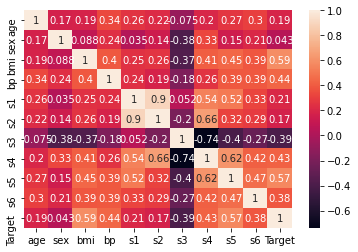

In [18]:
df_cor = df.iloc[:,:11]
correlation_matrix = df_cor.corr()

sns.heatmap(correlation_matrix, annot = True)
plt.show()

# Outlier Detection and Removal

## i)

In [19]:
mean_bmi = np.mean(df.bmi)
std_bmi = np.std(df.bmi)
print('mean of the bmi is', mean_bmi)
print('std. deviation is', std_bmi)
threshold = 3
outlier =[]
for i in df.bmi:
    z = (i-mean_bmi)/std_bmi
    if z > threshold:
        outlier.append(i)
print('outliers in BMI are:', outlier,'\n\n')

mean of the bmi is 1.131221719456823e-05
std. deviation is 0.04756788298782324
outliers in BMI are: [0.161, 0.171] 




In [20]:
mean_age = np.mean(df.age)
std_age = np.std(df.age)
print('mean of the age is', mean_age)
print('std. deviation is', std_age)
threshold = 3
outlier = []
for i in df.age:
    z = (i-mean_age)/std_age
    if z > threshold:
        outlier.append(i)
print('outliers in AGE are:', outlier, '\n\n')

mean of the age is -2.262443438914657e-06
std. deviation is 0.04758001114906025
outliers in AGE are: [] 




In [21]:
mean_bp = np.mean(df.bp)
std_bp = np.std(df.bp)
print('mean of the bp is', mean_bp)
print('std. deviation is', std_bp)
threshold = 3
outlier = []
for i in df.bp:
    z = (i-mean_bp)/std_bp
    if z > threshold:
        outlier.append(i)
print('outliers in BP} are:', outlier, '\n\n')

mean of the bp is 1.3574660633483547e-05
std. deviation is 0.04757370843523371
outliers in BP} are: [] 




In [22]:
mean_sex = np.mean(df.sex)
std_sex = np.std(df.sex)
print('mean of the sex is', mean_sex)
print('std. deviation is', std_sex)
threshold = 3
outlier = []
for i in df.sex:
    z = (i-mean_sex)/std_sex
    if z > threshold:
        outlier.append(i)
print('outliers in SEX are:', outlier)

mean of the sex is -4.072398190045058e-05
std. deviation is 0.04790359065525126
outliers in SEX are: []


## ii)

In [23]:
from scipy import stats  #remove the outliers from bmi using Z-Score formula
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df.bmi

0      0.062
1     -0.051
2      0.044
3     -0.012
4     -0.036
       ...  
437    0.020
438   -0.016
439   -0.016
440    0.039
441   -0.073
Name: bmi, Length: 442, dtype: float64

In [24]:
exists = 0.161 in df.bmi
print(exists)

exists = 0.171 in df.bmi
print(exists)

False
False


## iii)

In [27]:
# use IQR to display the outliers
Q1_s1 = df.s1.quantile(0.25)
Q3_s1 = df.s1.quantile(0.75)
print("Q1 for s1 is: ", Q1_s1)
print("Q3 for s1 is: ", Q3_s1,'\n\n')
IQR_s1 = Q3_s1 - Q1_s1
print("THE IQR FOR S1 is:",IQR_s1, '\n\n')

low_lim_s1 = Q1_s1 - 1.5 * IQR_s1
up_lim_s1 = Q3_s1 + 1.5 * IQR_s1
print('low_limit is', low_lim_s1)
print('up_limit is', up_lim_s1, '\n\n')

outlier=[]
for x in df.s1:
    if ((x> up_lim_s1) or (x<low_lim_s1)):
         outlier.append(x)
print(' outlier in the S1 are', outlier)


Q1_s2 = df.s2.quantile(0.25)
Q3_s2 = df.s2.quantile(0.75)
print("Q1 for s2 is: ", Q1_s2)
print("Q3 for s2 is: ", Q3_s2,'\n\n')
IQR_s2 = Q3_s2 - Q1_s2
print("THE IQR FOR S2 is:",IQR_s2, '\n\n')

low_lim_s2 = Q1_s2 - 1.5 * IQR_s2
up_lim_s2 = Q3_s2 + 1.5 * IQR_s2
print('low_limit is', low_lim_s2)
print('up_limit is', up_lim_s2, '\n\n')

outliers =[]
for x in df.s2:
    if ((x> up_lim_s2) or (x<low_lim_s2)):
         outlier.append(x)
print(' outliers in the S2 are', outliers)


Q1_s3 = df.s3.quantile(0.25)
Q3_s3 = df.s3.quantile(0.75)
print("Q1 for s3 is: ", Q1_s3)
print("Q3 for s3 is: ", Q3_s3,'\n\n')
IQR_s3 = Q3_s3 - Q1_s3
print("THE IQR FOR S3 is:",IQR_s3, '\n\n')

low_lim_s3 = Q1_s3 - 1.5 * IQR_s3
up_lim_s3 = Q3_s3 + 1.5 * IQR_s3
print('low_limit is', low_lim_s3)
print('up_limit is', up_lim_s3, '\n\n')

outlier=[]
for x in df.s3:
    if ((x> up_lim_s3) or (x<low_lim_s3)):
         outlier.append(x)
print(' outlier in the S3 are', outlier)


Q1_s4 = df.s4.quantile(0.25)
Q3_s4 = df.s4.quantile(0.75)
print("Q1 for s4 is: ", Q1_s4)
print("Q3 for s4 is: ", Q3_s4,'\n\n')
IQR_s4 = Q3_s4 - Q1_s4
print("THE IQR FOR s4 is:",IQR_s4, '\n\n')

low_lim_s4 = Q1_s4 - 1.5 * IQR_s4
up_lim_s4 = Q3_s4 + 1.5 * IQR_s4
print('low_limit is', low_lim_s4)
print('up_limit is', up_lim_s4, '\n\n')

outlier=[]
for x in df.s4:
    if ((x> up_lim_s4) or (x<low_lim_s4)):
         outlier.append(x)
print(' outlier in the S4 are', outlier)


Q1_s5 = df.s5.quantile(0.25)
Q3_s5 = df.s5.quantile(0.75)
print("Q1 for s5 is: ", Q1_s5)
print("Q3 for s5 is: ", Q3_s5,'\n\n')
IQR_s5 = Q3_s5 - Q1_s5
print("THE IQR FOR s5 is:",IQR_s5, '\n\n')

low_lim_s5 = Q1_s5 - 1.5 * IQR_s5
up_lim_s5 = Q3_s5 + 1.5 * IQR_s5
print('low_limit is', low_lim_s5)
print('up_limit is', up_lim_s5, '\n\n')

outlier=[]
for x in df.s5:
    if ((x> up_lim_s5) or (x<low_lim_s5)):
         outlier.append(x)
print(' outlier in the S5 are', outlier)


Q1_s6 = df.s6.quantile(0.25)
Q3_s6 = df.s6.quantile(0.75)
print("Q1 for s6 is: ", Q1_s6)
print("Q3 for s6 is: ", Q3_s6,'\n\n')
IQR_s6 = Q3_s6 - Q1_s6
print("THE IQR FOR s6 is:",IQR_s6, '\n\n')

low_lim_s6 = Q1_s6 - 1.5 * IQR_s6
up_lim_s6 = Q3_s6 + 1.5 * IQR_s6
print('low_limit is', low_lim_s6)
print('up_limit is', up_lim_s6, '\n\n')

outlier=[]
for x in df.s6:
    if ((x> up_lim_s6) or (x<low_lim_s6)):
         outlier.append(x)
print(' outlier in the S6 are', outlier)

Q1 for s1 is:  -0.0345
Q3 for s1 is:  0.0285 


THE IQR FOR S1 is: 0.063 


low_limit is -0.129
up_limit is 0.123 


 outlier in the S1 are [0.153, 0.133, 0.126, 0.154, 0.128, 0.125, 0.125, 0.128]
Q1 for s2 is:  -0.03
Q3 for s2 is:  0.02975 


THE IQR FOR S2 is: 0.05975 


low_limit is -0.119625
up_limit is 0.119375 


 outliers in the S2 are []
Q1 for s3 is:  -0.034999999999999996
Q3 for s3 is:  0.029249999999999998 


THE IQR FOR S3 is: 0.06425 


low_limit is -0.131375
up_limit is 0.125625 


 outlier in the S3 are [0.133, 0.181, 0.152, 0.177, 0.159, 0.141, 0.174]
Q1 for s4 is:  -0.039
Q3 for s4 is:  0.034 


THE IQR FOR s4 is: 0.07300000000000001 


low_limit is -0.14850000000000002
up_limit is 0.14350000000000002 


 outlier in the S4 are [0.185, 0.145, 0.155, 0.145]
Q1 for s5 is:  -0.033
Q3 for s5 is:  0.032 


THE IQR FOR s5 is: 0.065 


low_limit is -0.1305
up_limit is 0.1295 


 outlier in the S5 are [0.134, 0.134, 0.133, 0.132, 0.13]
Q1 for s6 is:  -0.033
Q3 for s6 is:  0.028

## iv)

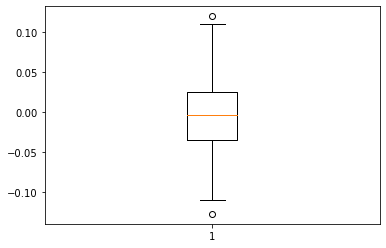

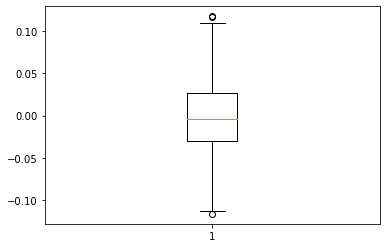

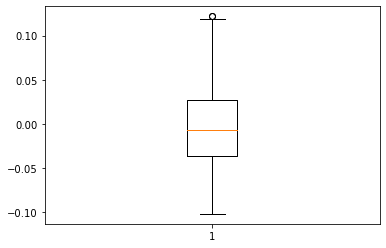

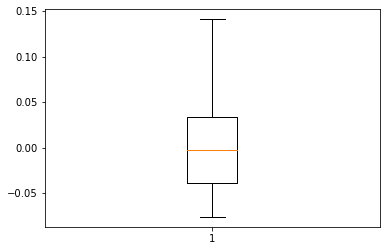

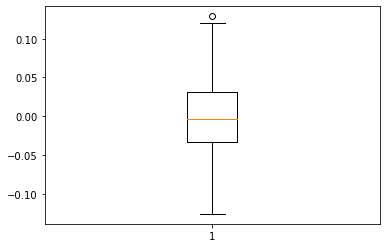

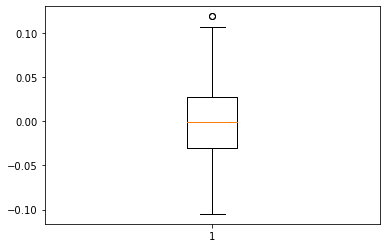

In [28]:
# use IQR to remove outliers
condition_s1 = ~((df['s1'] < (Q1_s1 - 1.5 * IQR_s1)) | (df['s1'] > (Q3_s1 + 1.5 * IQR_s1)))

filtered_df = df[condition_s1]
plt.boxplot(filtered_df.s1)
plt.show()



condition_s2 = ~((df['s2'] < (Q1_s2 - 1.5 * IQR_s2)) | (df['s2'] > (Q3_s2 + 1.5 * IQR_s2)))

filtered_df = df[condition_s2]
plt.boxplot(filtered_df.s2)
plt.show()



condition_s3 = ~((df['s3'] < (Q1_s3 - 1.5 * IQR_s3)) | (df['s3'] > (Q3_s3 + 1.5 * IQR_s3)))

filtered_df = df[condition_s3]
plt.boxplot(filtered_df.s3)
plt.show()



condition_s4 = ~((df['s4'] < (Q1_s4 - 1.5 * IQR_s4)) | (df['s4'] > (Q3_s4 + 1.5 * IQR_s4)))

filtered_df = df[condition_s4]
plt.boxplot(filtered_df.s4)
plt.show()



condition_s5 = ~((df['s5'] < (Q1_s5 - 1.5 * IQR_s5)) | (df['s5'] > (Q3_s5 + 1.5 * IQR_s5)))

filtered_df = df[condition_s5]
plt.boxplot(filtered_df.s5)
plt.show()




condition_s6 = ~((df['s6'] < (Q1_s6 - 1.5 * IQR_s6)) | (df['s6'] > (Q3_s6 + 1.5 * IQR_s6)))

filtered_df = df[condition_s6]
plt.boxplot(filtered_df.s6)
plt.show()

# CRIMES_FTI DATASET

## Data Description

In [30]:
data=pd.read_excel("crimes_fti.xls")

### i)

In [31]:
data.shape

(65535, 17)

### ii)

In [32]:
data.head(20)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-03-10 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,30/08/2018 20:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-03-10 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-03-10 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-03-10 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,2018-02-10 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,ABC,NaN,2018-03-10 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,2018-03-10 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,2018-03-10 19:27:00,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,3410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,2018-03-10 20:00:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


### iii)

In [33]:
data.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

### iv)

In [34]:
data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,65535.000000,65535.000000,65535.000000,65535.000000,61271.000000,61271.000000
mean,2352.644083,2017.992859,5.743282,13.055543,42.149419,-70.803888
std,1174.988899,0.099948,2.250567,6.278597,2.728613,4.413944
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2018.000000,4.000000,9.000000,42.296934,-71.097074
50%,3006.000000,2018.000000,6.000000,14.000000,42.325528,-71.077610
75%,3202.000000,2018.000000,8.000000,18.000000,42.348209,-71.062563
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [35]:
data.var()

OFFENSE_CODE    1.380599e+06
YEAR            9.989592e-03
MONTH           5.065050e+00
HOUR            3.942079e+01
Lat             7.445328e+00
Long            1.948290e+01
dtype: float64

In [36]:
data.std()

OFFENSE_CODE    1174.988899
YEAR               0.099948
MONTH              2.250567
HOUR               6.278597
Lat                2.728613
Long               4.413944
dtype: float64

### v)

In [37]:
data.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                 513
REPORTING_AREA             0
SHOOTING               65351
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  17
STREET                  1102
Lat                     4264
Long                    4264
Location                   0
dtype: int64

## Dealing with Data Quality Problems

### i)

In [38]:
data.nunique()

INCIDENT_NUMBER        58233
OFFENSE_CODE             179
OFFENSE_CODE_GROUP        60
OFFENSE_DESCRIPTION      179
DISTRICT                  12
REPORTING_AREA           880
SHOOTING                   1
OCCURRED_ON_DATE       47974
YEAR                       4
MONTH                     12
DAY_OF_WEEK                7
HOUR                      24
UCR_PART                   4
STREET                  3281
Lat                    11422
Long                   11422
Location               11428
dtype: int64

### ii)

In [39]:
data=data.drop_duplicates()

In [40]:
data.shape

(65535, 17)

In [41]:
data.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

### vi)

In [42]:
data.dropna(axis=1, thresh=0.50*len(data), inplace=True)
data.reset_index(drop=True, inplace=True)

In [43]:
data.isnull().sum()

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT                513
REPORTING_AREA            0
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
UCR_PART                 17
STREET                 1102
Lat                    4264
Long                   4264
Location                  0
dtype: int64

### v)

In [44]:
data['Lat'].fillna((data['Lat'].mean()), inplace=True)
data['Long'].fillna((data['Long'].mean()), inplace=True)

In [47]:
data_mode=data.mode()
for x in data.columns.values:
    data[x]=data[x].fillna(value=data_mode[x].iloc[0])

## Feature Encoding and Discretization

### i)

In [49]:
Label_Encoder = LabelEncoder()
data['OFFENSE_CODE_GROUP'] = Label_Encoder.fit_transform(data['OFFENSE_CODE_GROUP'])
data['DAY_OF_WEEK'] = Label_Encoder.fit_transform(data['DAY_OF_WEEK'])
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,12,DISTURBING THE PEACE,E18,495,2018-03-10 20:13:00,2018,10,6,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,45,PROPERTY - LOST,D14,795,30/08/2018 20:00,2018,8,4,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,39,THREATS TO DO BODILY HARM,B2,329,2018-03-10 19:20:00,2018,10,6,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,0,ASSAULT - AGGRAVATED - BATTERY,A1,92,2018-03-10 20:00:00,2018,10,6,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,1,AIRCRAFT INCIDENTS,A7,36,2018-03-10 20:49:00,2018,10,6,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


### ii)

In [51]:
one_hot = pd.get_dummies(data['UCR_PART'])  
data = data.drop('UCR_PART',axis = 1)     # Drop column as it is now encoded
data = data.join(one_hot)    # Join the encoded data
data  

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,Other,Part One,Part Three,Part Two
0,I182080058,2403,12,DISTURBING THE PEACE,E18,495,2018-03-10 20:13:00,2018,10,6,20,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",0,0,0,1
1,I182080053,3201,45,PROPERTY - LOST,D14,795,30/08/2018 20:00,2018,8,4,20,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",0,0,1,0
2,I182080052,2647,39,THREATS TO DO BODILY HARM,B2,329,2018-03-10 19:20:00,2018,10,6,19,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",0,0,0,1
3,I182080051,413,0,ASSAULT - AGGRAVATED - BATTERY,A1,92,2018-03-10 20:00:00,2018,10,6,20,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",0,1,0,0
4,I182080050,3122,1,AIRCRAFT INCIDENTS,A7,36,2018-03-10 20:49:00,2018,10,6,20,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,I182010062,3301,57,VERBAL DISPUTE,C6,936,2018-07-02 13:11:00,2018,2,6,13,W SEVENTH ST,42.336979,-71.055003,"(42.33697857, -71.05500277)",0,0,1,0
65531,I182010061,3006,33,SICK/INJURED/MEDICAL - PERSON,E13,930,2018-07-02 13:17:00,2018,2,6,13,COLUMBUS AVE,42.315069,-71.097466,"(42.31506898, -71.09746579)",0,0,1,0
65532,I182010060,3305,3,DEMONSTRATIONS/RIOT,A1,111,2018-07-02 11:54:00,2018,2,6,11,TREMONT ST,42.354284,-71.063804,"(42.35428377, -71.06380404)",0,0,1,0
65533,I182010058,1841,13,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,C11,402,2018-07-02 14:13:00,2018,2,6,14,ROCKWELL ST,42.283875,-71.071550,"(42.28387495, -71.07154989)",0,0,0,1


### iii)

In [52]:
data['HOUR']=pd.cut(data["HOUR"],bins=[0, 8, 16, 24,30], labels=["Morning", "Afternoon", "Evening", "Night"])

<AxesSubplot:>

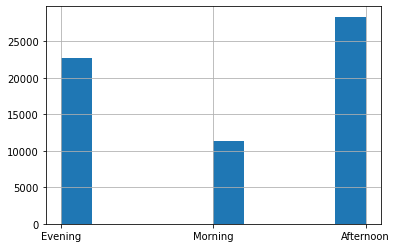

In [53]:
data['HOUR'].hist()